In [121]:

import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [122]:
df = pd.read_csv('train.csv', usecols = ['Age','Fare','Survived'])

In [123]:
df.head(4)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000


In [124]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [125]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

C:\Users\NB\AppData\Local\Temp\ipykernel_12208\1652017284.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace = True)


In [126]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

x_train.shape

(712, 2)

In [128]:
x

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


C:\Users\NB\AppData\Local\Temp\ipykernel_12208\2754684644.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


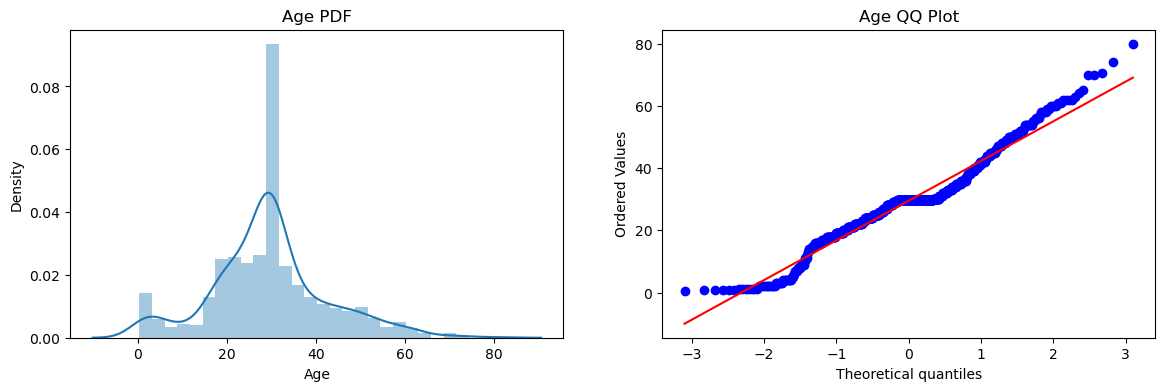

In [129]:
plt.figure(figsize =( 14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist = 'norm', plot = plt)
plt.title('Age QQ Plot')

plt.show()

In [130]:
# the above is close to normal distribution

C:\Users\NB\AppData\Local\Temp\ipykernel_12208\697049992.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


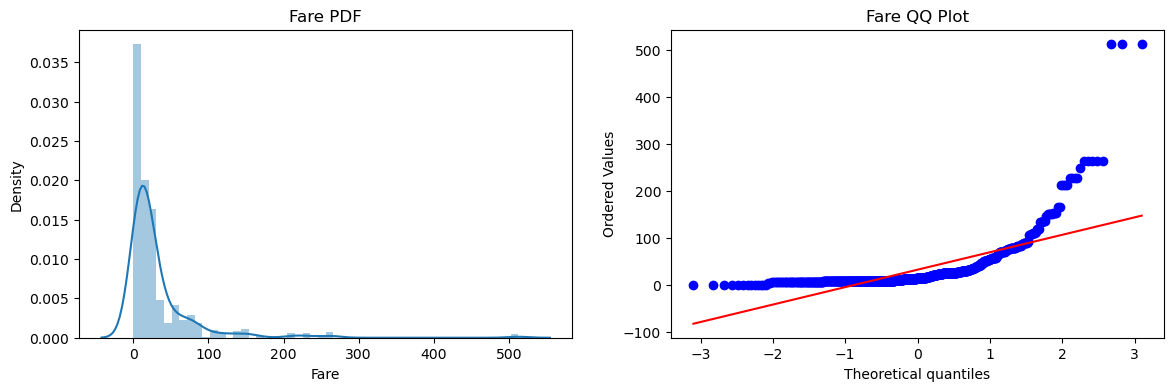

In [131]:
plt.figure(figsize =( 14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist = 'norm', plot = plt)
plt.title('Fare QQ Plot')

plt.show()

In [132]:
# the above is heavily skewed and is not normal at all

In [133]:
# since we can clearly see that it is right skewed then we would apply log transofrm to this


In [134]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [135]:
clf

LogisticRegression()

In [136]:
clf2

DecisionTreeClassifier()

In [137]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print("Accuracy LogisticREgression = :", accuracy_score(y_test,y_pred))
print("Accuracy DecisionTree = :", accuracy_score(y_test,y_pred1))

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

print("Lr", np.mean(cross_val_score(clf,x_train,y_train,scoring = 'accuracy',cv = 10)))
print("DT", np.mean(cross_val_score(clf2,x_train,y_train,scoring = 'accuracy',cv = 10)))
     

Accuracy LogisticREgression = : 0.6480446927374302
Accuracy DecisionTree = : 0.6871508379888268
Lr 0.6557902973395932
DT 0.6249804381846635


In [138]:
# now what if i apply log transform

In [139]:
trf = FunctionTransformer(func = np.log1p)

In [140]:
# the above is func = we can either give a normal transformer or our own made transformer


In [141]:
# np.log simply applies log np.log1p adds 1 to the value always since gives errror if value is 0

In [142]:
x_train_transformer = trf.fit_transform(x_train)
x_test_transformer = trf.fit_transform(x_test)


In [143]:
x_train_transformer

,Age,Fare
331,3.839452,3.384390
733,3.178054,2.639057
382,3.496508,2.188856
704,3.295837,2.180892
813,1.945910,3.474293
...,...,...
106,3.091042,2.157559
270,3.424234,3.465736
860,3.737670,2.715244
435,2.708050,4.795791


In [144]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [145]:
clf.fit(x_train_transformer,y_train)
clf2.fit(x_train_transformer,y_train)

y_pred = clf.predict(x_test_transformer)
y_pred1 = clf2.predict(x_test_transformer)

print("Accuracy LogisticREgression = :", accuracy_score(y_test,y_pred))
print("Accuracy DecisionTree = :", accuracy_score(y_test,y_pred1))
      

Accuracy LogisticREgression = : 0.6815642458100558
Accuracy DecisionTree = : 0.6815642458100558


In [146]:
# decision tree pr kch khas frq ni pra but logistic regression me imporvement agya

In [147]:
x_transformed = trf.fit_transform(x)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("Lr", np.mean(cross_val_score(clf,x_transformed,y,scoring = 'accuracy',cv = 10)))
print("DT", np.mean(cross_val_score(clf2,x_transformed,y,scoring = 'accuracy',cv = 10)))
      


Lr 0.678027465667915
DT 0.6633208489388265


In [148]:
x_transformed

,Age,Fare
0,3.135494,2.110213
1,3.663562,4.280593
2,3.295837,2.188856
3,3.583519,3.990834
4,3.583519,2.202765
...,...,...
886,3.332205,2.639057
887,2.995732,3.433987
888,3.424234,3.196630
889,3.295837,3.433987


C:\Users\NB\AppData\Local\Temp\ipykernel_12208\1823873056.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


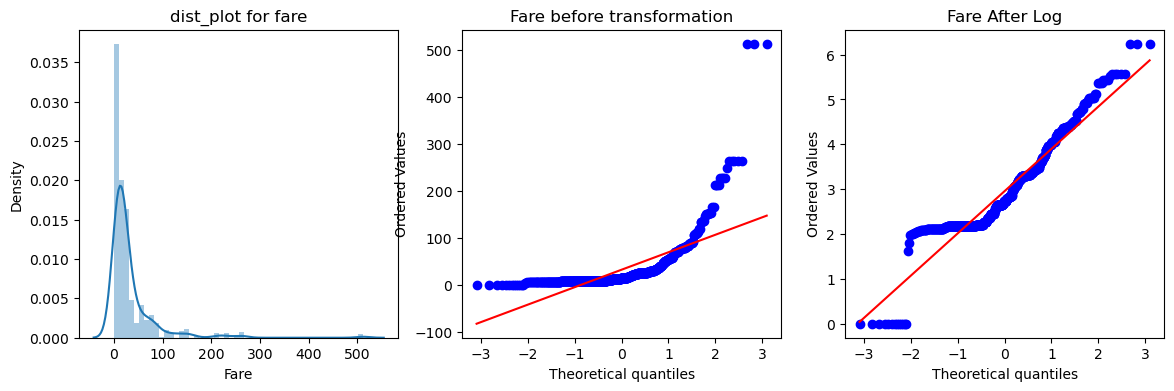

In [149]:
plt.figure(figsize = (14,4))
plt.subplot(131)
sns.distplot(x_train['Fare'])
plt.title('dist_plot for fare')
plt.subplot(132)
stats.probplot(x_train['Fare'], dist ='norm', plot = plt)
plt.title('Fare before transformation')

plt.subplot(133)
stats.probplot(x_train_transformer['Fare'], dist = 'norm', plot = plt)
plt.title('Fare After Log')
plt.show()

In [150]:
# you can see that since fare was right skewed

C:\Users\NB\AppData\Local\Temp\ipykernel_12208\3825624973.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


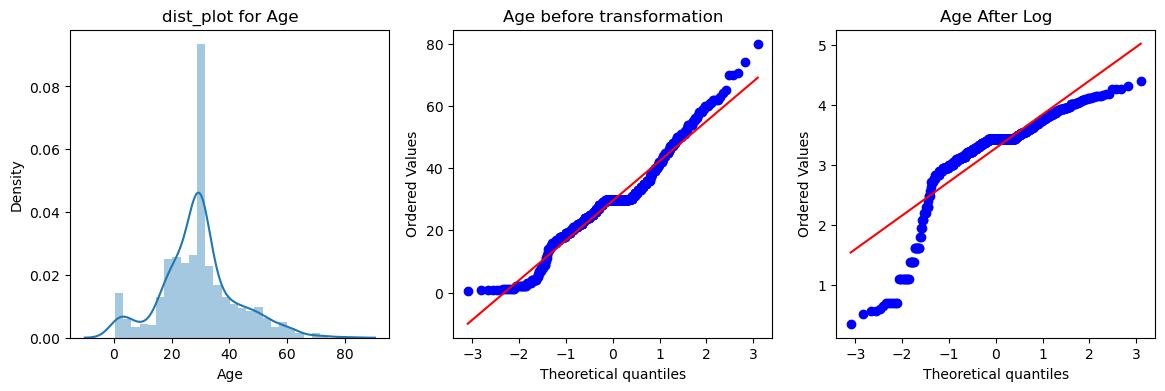

In [151]:
plt.figure(figsize = (14,4))
plt.subplot(131)
sns.distplot(x_train['Age'])
plt.title('dist_plot for Age')
plt.subplot(132)
stats.probplot(x_train['Age'], dist ='norm', plot = plt)
plt.title('Age before transformation')

plt.subplot(133)
stats.probplot(x_train_transformer['Age'], dist = 'norm', plot = plt)
plt.title('Age After Log')
plt.show()

In [152]:
# Age was not right skewed so it disrupts the data

In [153]:
trf2 = ColumnTransformer([
    ('log',FunctionTransformer(func = np.log1p),['Fare'])], remainder = 'passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.fit_transform(x_test)


In [158]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)


y_pred = clf.predict(x_test_transformed2)
y_pred = clf2.predict(x_test_transformed2)


In [159]:

x_transformed2 = trf2.fit_transform(x)
print('Accuracy LR',np.mean(cross_val_score(clf,x_transformed2,y,scoring = 'accuracy', cv = 10)))
print('Accuracy DT',np.mean(cross_val_score(clf2,x_transformed2,y,scoring = 'accuracy', cv = 10)))

Accuracy LR 0.6712609238451936
Accuracy DT 0.6655680399500624


In [161]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6150561797752809


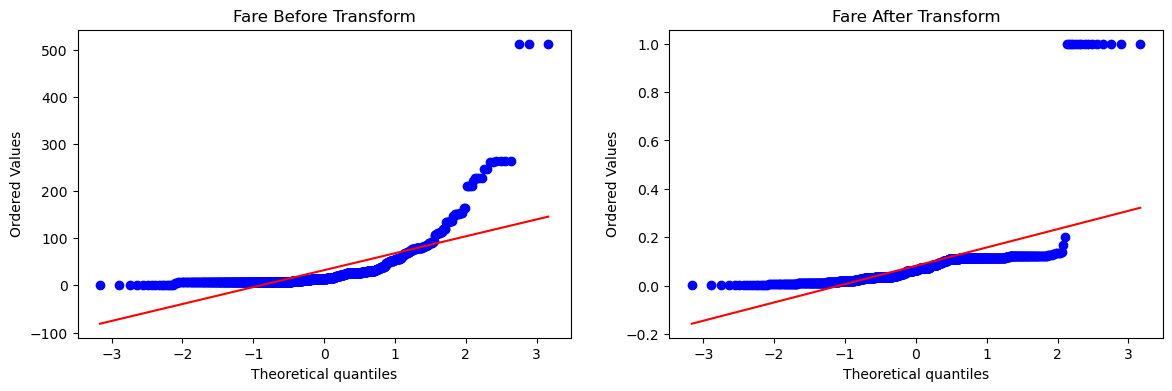

In [176]:
apply_transform(lambda x: (1/(x+1)))

Accuracy 0.6195131086142323


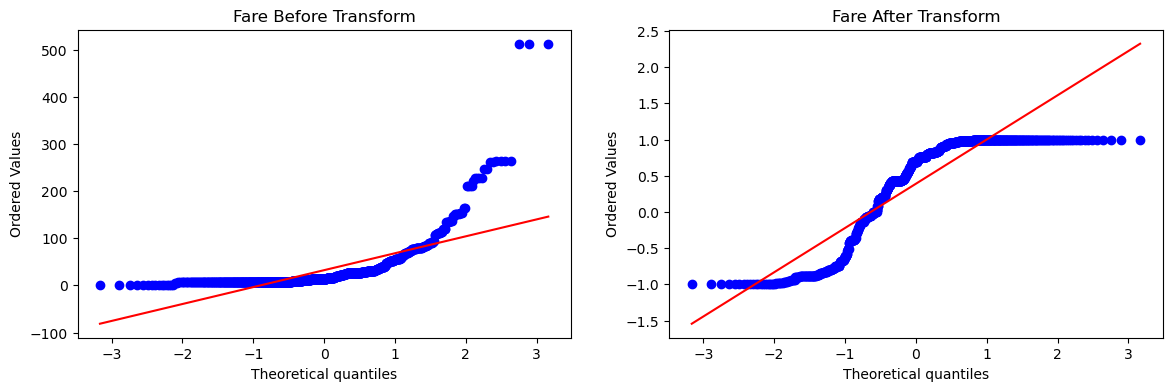

In [175]:
apply_transform( np.sin)

Accuracy 0.6184144818976279


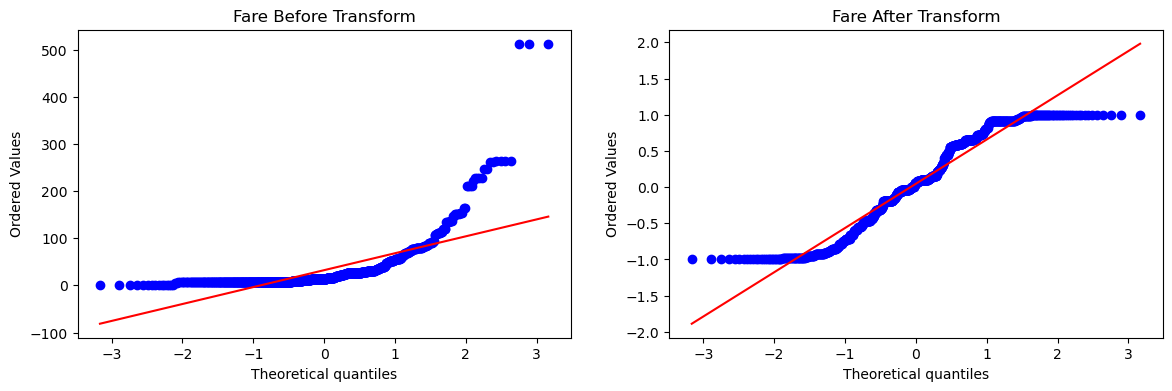

In [180]:
apply_transform(x: )